## Assignment 1

Please download the BBC news dataset using the following path:
http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip

### In the assignment 1, you need to complete the following tasks:
**1**. Downsampling the number of articles in each class to 300.

**2**. Applying at least 5 different text cleaning methods including removing stopwords, stemming or lemmatization, removing punctuations, uniforming uppercase and lowercase, removing special characters, etc., to the articles.

**3**. Applying text summarization to all of the articles and save them as new dataset.
1) applying extractive summarization and save the results as new_dataset_1

2) applying abstractive summarization and save the results as new_dataset_2

note: you can refer to this article (https://towardsdatascience.com/simple-abstractive-text-summarization-with-pretrained-t5-text-to-text-transfer-transformer-10f6d602c426) for the abstractive summarization. Or you can build your own abstractive summarization model.

**4**. Using the following models for prediction: random forest, support vector machine, k nearest neighbors, and multinomial naive bayes. (applying these models to the new_dataset_1 and new_dataset_2 respectively)

**5**. Comparing the performance of the above 4 models and selecting the best model.

**6**. Applying the best performance model to new_dataset_1 and new_dataset_2 individually, and comparing the predictive performance. Which dataset provides more predictive power? Please analyze and explain it. 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import nltk
import os
import glob
from nltk.cluster.util import cosine_distance
import networkx as nx

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# just run this code block once you upload the zip file!
from google.colab import files
files.upload()


!unzip bbc-fulltext.zip

Saving bbc-fulltext.zip to bbc-fulltext.zip
Archive:  bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflatin

### 1. Downsampling the number of articles in each class to 50.

In [4]:
for file in os.listdir('/content/bbc'):
  print(file)

politics
sport
tech
business
entertainment
README.TXT


In [5]:
# initializing empty dataframes
data_df = pd.DataFrame()
df = pd.DataFrame()

# reading the file content into datafarme
for file in os.listdir('/content/bbc'):
    cont = 0
    for filename in glob.glob("/content/bbc/"+ str(file)+"/*.txt"):
        if cont < 50:
            cont = cont+1
            data = []
            with open(filename,mode = "r",encoding="utf8", errors='ignore') as myfile:
              data.append(myfile.read()) 
            df = pd.DataFrame(data)
            df['Category'] = str(file)
            data_df = pd.concat([data_df, df])
              
# renaming column names
data_df.rename(columns = {0:'Text'},inplace = True)

# resetting index
data_df = data_df.reset_index(drop = True)

In [6]:
data_df.groupby('Category').count()

,Text
Category,
business,50
entertainment,50
politics,50
sport,50
tech,50


### 2. Applying at least 5 different text cleaning methods including removing stopwords, stemming or lemmatization, removing punctuations, uniforming uppercase and lowercase, removing special characters, etc., to the articles.

In [10]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import re, string
from nltk.corpus import wordnet

LE = preprocessing.LabelEncoder()

# Encode labels in column 'Category'.
data_df['Category']=LE.fit_transform(data_df['Category'])

#convert to lowercase, strip and remove punctuations
def preprocess(text_):
    text_ = text.replace('\n',' ')
    text_ = text.lower() 
    text_=text.strip()  
    text_=re.compile('<.*?>').sub('', text) 
    text_ = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text_ = re.sub('\s+', ' ', text)  
    text_ = re.sub(r'\[[0-9]*\]',' ',text) 
    text_=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text_ = re.sub(r'\d',' ',text) 
    text_ = re.sub(r'\s+',' ',text) 
    return text_

# STOPWORD REMOVAL
def stopword(strng):
    a= [i for i in strng.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#Lemmatization

# Initialize the lemmatizer
WL = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tags):
    if tags.startswith('J'):
        return wordnet.ADJ
    elif tags.startswith('V'):
        return wordnet.VERB
    elif tags.startswith('N'):
        return wordnet.NOUN
    elif tags.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Tokenize the sentence
def lemmatizer(strng_):
    word_pos_tags = nltk.pos_tag(word_tokenize(strng_)) # Get position tags
    a=[WL.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string__):
    return lemmatizer(stopword(preprocess(string__)))


In [17]:
data_df['Clean_Text'] = data_df['Text'].apply(lambda x: finalpreprocess(x))

In [18]:
data_df

,Text,Category,Clean_Text
0,MPs criticise child access system\n\nDivorced ...,2,mp criticise child access system divorce paren...
1,Blair backs 'pre-election budget'\n\nTony Blai...,2,blair back pre election budget tony blair back...
2,Talks aim to avert pension strike\n\nTalks aim...,2,talk aim avert pension strike talk aim avert s...
3,Visa row mandarin made Sir John\n\nThe top civ...,2,visa row mandarin make sir john top civil serv...
4,E-University 'disgraceful waste'\n\nA failed g...,2,e university disgraceful waste fail government...
...,...,...,...
245,Vera Drake leads UK Oscar hopes\n\nMike Leigh'...,1,vera drake lead uk oscar hope mike leigh film ...
246,New York rockers top talent poll\n\nNew York e...,1,new york rocker top talent poll new york elect...
247,Comic Morris returns with sitcom\n\nComedian C...,1,comic morris return sitcom comedian chris morr...
248,Jamelia's return to the top\n\nR&B star Jameli...,1,jamelia return top r b star jamelia three brit...


### 3. Applying text summarization to all of the articles and save them as new dataset.

#### 3.1.applying extractive summarization and save the results as new_dataset_1

In [19]:
# Function to read article

def read_article(filedata):
#     file = open(file_name, "r")
#     filedata = file.readlines()
    artcl = filedata.split(". ")
    sentences = []

    for sentence in artcl:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
#     sentences.pop() 
    
    return sentences

In [20]:
# Function to get the sentence similarity

def sentence_similarity(sentence1, sentence2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    # converting to lower case
    sentence1 = [w.lower() for w in sentence1]
    sentence2 = [w.lower() for w in sentence2]
 
    all_words = list(set(sentence1 + sentence2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for wrds in sentence1:
        if wrds in stopwords:
            continue
        vector1[all_words.index(wrds)] += 1
 
    # build the vector for the second sentence
    for wrds in sentence2:
        if wrds in stopwords:
            continue
        vector2[all_words.index(wrds)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [21]:
# Building similarity

def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [22]:
# Generating summary

def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)      

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    return ". ".join(summarize_text)

In [23]:
new_dataset_1 = pd.DataFrame()
for i in range(len(data_df)):
  try:
    new_dataset_1.loc[i,'Text'] = generate_summary(data_df['Clean_Text'][i])
  except:
    new_dataset_1.loc[i,'Text'] = generate_summary(data_df['Clean_Text'][i],1)
  new_dataset_1.loc[i,'Category'] = data_df['Category'][i]

In [24]:
new_dataset_1

,Text,Category
0,mp criticise child access system divorce paren...,2.0
1,blair back pre election budget tony blair back...,2.0
2,talk aim avert pension strike talk aim avert s...,2.0
3,visa row mandarin make sir john top civil serv...,2.0
4,e university disgraceful waste fail government...,2.0
...,...,...
245,vera drake lead uk oscar hope mike leigh film ...,1.0
246,new york rocker top talent poll new york elect...,1.0
247,comic morris return sitcom comedian chris morr...,1.0
248,jamelia return top r b star jamelia three brit...,1.0


In [25]:
#getting tf idf vector

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
feature = tf_idf.fit_transform(new_dataset_1.Text).toarray()
labels = new_dataset_1.Category
feature.shape

(250, 1690)

## Model Fitting & Cross Validation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(new_dataset_1['Text'], new_dataset_1['Category'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5),
]
CV = 5
df_cv = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
df_cv = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

## Comparing Model accuracies

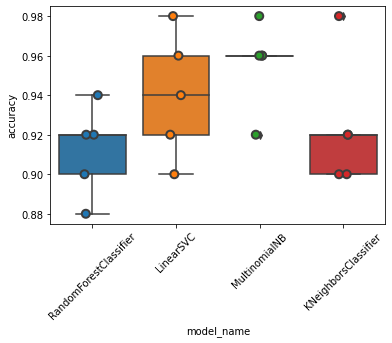

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=df_cv)
sns.stripplot(x='model_name', y='accuracy', data=df_cv, 
            size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [28]:
df_cv.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.924
LinearSVC                 0.940
MultinomialNB             0.956
RandomForestClassifier    0.912
Name: accuracy, dtype: float64

### MultinomialNB perform better than the other classifiers

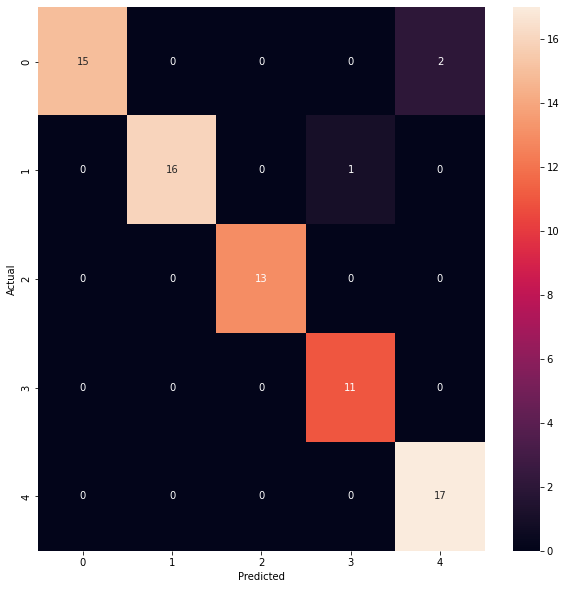

In [31]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, new_dataset_1.index, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 3.2.applying abstractive summarization and save the results as new_dataset_2

In [36]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

In [38]:
new_dataset_2 = pd.DataFrame()
for i in range(len(data_df)):
  print('Document:',i)
  t5_prepared_Text = "summarize: "+ data_df['Clean_Text'][i]
  tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

  # summmarize 
  summary_ids = model.generate(tokenized_text,
                                      num_beams=4,
                                      no_repeat_ngram_size=2,
                                      min_length=30,
                                      max_length=100,
                                      early_stopping=True)

  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True) 
  new_dataset_2.loc[i,'Text'] = output
  new_dataset_2.loc[i,'Category'] = data_df['Category'][i]
  new_dataset_2.to_csv('/content/drive/MyDrive/dataset.csv')

Document: 0
Document: 1
Document: 2
Document: 3
Document: 4


Token indices sequence length is longer than the specified maximum sequence length for this model (632 > 512). Running this sequence through the model will result in indexing errors


Document: 5
Document: 6
Document: 7
Document: 8
Document: 9
Document: 10
Document: 11
Document: 12
Document: 13
Document: 14
Document: 15


Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors


Document: 16
Document: 17
Document: 18
Document: 19
Document: 20
Document: 21
Document: 22
Document: 23
Document: 24
Document: 25
Document: 26
Document: 27
Document: 28


Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors


Document: 29
Document: 30
Document: 31
Document: 32
Document: 33
Document: 34
Document: 35
Document: 36
Document: 37
Document: 38
Document: 39
Document: 40
Document: 41
Document: 42


Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


Document: 43
Document: 44
Document: 45
Document: 46
Document: 47
Document: 48
Document: 49
Document: 50
Document: 51


Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors


Document: 52
Document: 53
Document: 54
Document: 55
Document: 56
Document: 57
Document: 58
Document: 59
Document: 60
Document: 61
Document: 62
Document: 63
Document: 64
Document: 65
Document: 66
Document: 67
Document: 68
Document: 69
Document: 70
Document: 71
Document: 72
Document: 73
Document: 74
Document: 75


Token indices sequence length is longer than the specified maximum sequence length for this model (568 > 512). Running this sequence through the model will result in indexing errors


Document: 76
Document: 77
Document: 78
Document: 79
Document: 80
Document: 81
Document: 82
Document: 83
Document: 84
Document: 85


Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors


Document: 86


Token indices sequence length is longer than the specified maximum sequence length for this model (892 > 512). Running this sequence through the model will result in indexing errors


Document: 87


Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


Document: 88
Document: 89
Document: 90
Document: 91


Token indices sequence length is longer than the specified maximum sequence length for this model (654 > 512). Running this sequence through the model will result in indexing errors


Document: 92
Document: 93
Document: 94
Document: 95
Document: 96
Document: 97
Document: 98
Document: 99
Document: 100
Document: 101
Document: 102


Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors


Document: 103
Document: 104
Document: 105
Document: 106
Document: 107


Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors


Document: 108
Document: 109
Document: 110
Document: 111
Document: 112
Document: 113
Document: 114
Document: 115


Token indices sequence length is longer than the specified maximum sequence length for this model (918 > 512). Running this sequence through the model will result in indexing errors


Document: 116
Document: 117


Token indices sequence length is longer than the specified maximum sequence length for this model (619 > 512). Running this sequence through the model will result in indexing errors


Document: 118


Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors


Document: 119
Document: 120


Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors


Document: 121
Document: 122
Document: 123
Document: 124
Document: 125
Document: 126
Document: 127


Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors


Document: 128
Document: 129
Document: 130


Token indices sequence length is longer than the specified maximum sequence length for this model (705 > 512). Running this sequence through the model will result in indexing errors


Document: 131
Document: 132
Document: 133


Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


Document: 134
Document: 135
Document: 136
Document: 137
Document: 138


Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors


Document: 139
Document: 140
Document: 141
Document: 142


Token indices sequence length is longer than the specified maximum sequence length for this model (684 > 512). Running this sequence through the model will result in indexing errors


Document: 143
Document: 144
Document: 145
Document: 146
Document: 147
Document: 148


Token indices sequence length is longer than the specified maximum sequence length for this model (622 > 512). Running this sequence through the model will result in indexing errors


Document: 149
Document: 150
Document: 151
Document: 152
Document: 153
Document: 154
Document: 155
Document: 156
Document: 157
Document: 158
Document: 159
Document: 160
Document: 161
Document: 162
Document: 163
Document: 164
Document: 165
Document: 166
Document: 167
Document: 168
Document: 169
Document: 170
Document: 171
Document: 172
Document: 173
Document: 174
Document: 175
Document: 176
Document: 177
Document: 178


Token indices sequence length is longer than the specified maximum sequence length for this model (645 > 512). Running this sequence through the model will result in indexing errors


Document: 179
Document: 180
Document: 181
Document: 182
Document: 183
Document: 184
Document: 185
Document: 186
Document: 187
Document: 188
Document: 189
Document: 190
Document: 191
Document: 192
Document: 193
Document: 194
Document: 195
Document: 196
Document: 197
Document: 198
Document: 199
Document: 200
Document: 201
Document: 202
Document: 203
Document: 204
Document: 205
Document: 206
Document: 207
Document: 208
Document: 209
Document: 210
Document: 211
Document: 212
Document: 213
Document: 214
Document: 215


Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Running this sequence through the model will result in indexing errors


Document: 216
Document: 217
Document: 218
Document: 219
Document: 220
Document: 221
Document: 222
Document: 223
Document: 224
Document: 225
Document: 226
Document: 227
Document: 228


Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors


Document: 229
Document: 230
Document: 231
Document: 232
Document: 233
Document: 234
Document: 235
Document: 236


Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors


Document: 237
Document: 238
Document: 239
Document: 240
Document: 241
Document: 242
Document: 243
Document: 244
Document: 245


Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors


Document: 246
Document: 247
Document: 248
Document: 249


In [3]:
new_dataset_2 = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [4]:
new_dataset_2 

,Unnamed: 0,Text,Category
0,0,criticise child access system divorce parent s...,2.0
1,1,blair back chancellor gordon brown pre budget ...,2.0
2,2,talks aim avert pension strike talk aim take p...,2.0
3,3,mr blunkett ex lover nanny come fast tracked o...,2.0
4,4,uk university course online brand disgraceful ...,2.0
...,...,...,...
245,245,vera drake lead uk oscar hope year academy awa...,1.0
246,246,music scene promise new act bravery compare cu...,1.0
247,247,comic morris return screen new sitcom spoof lo...,1.0
248,248,jamelia davis sign record label age release fi...,1.0


## Modelling and selecting best model

In [5]:
#getting tf idf vector

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tf_idf.fit_transform(new_dataset_2.Text).toarray()
labels = new_dataset_2.Category
features.shape

(250, 628)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(new_dataset_2['Text'], new_dataset_2['Category'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5),
]
CV = 5
df_cv = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
df_cv = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

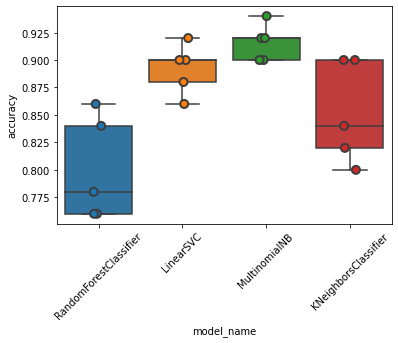

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=df_cv)
sns.stripplot(x='model_name', y='accuracy', data=df_cv, 
            size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [8]:
df_cv.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.852
LinearSVC                 0.892
MultinomialNB             0.916
RandomForestClassifier    0.800
Name: accuracy, dtype: float64

### MultinomialNB perform better than the other classifiers

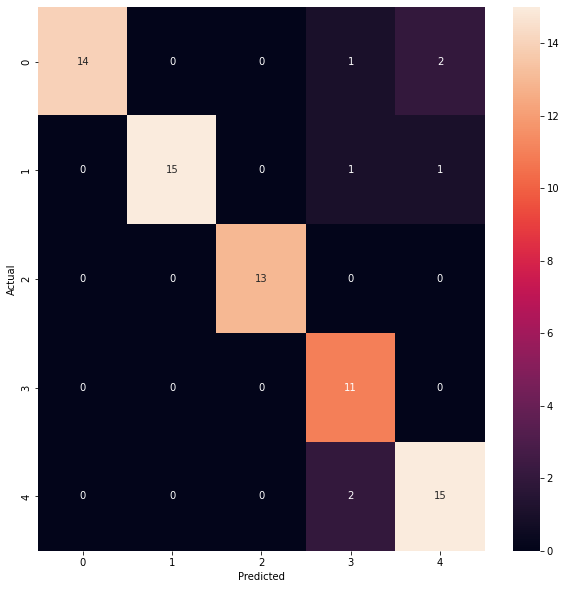

In [10]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, new_dataset_2.index, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Extractive summary gave better results than abstractive summary but tuning the abstractive models will attain better results eventually. In reality, extractive summarizes by selecting the important parts of text whereas abstractive understand the text context and generates summary. So, on unseen the performance of Abstractive will be better.